Importing libraries

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv 
import seaborn as sns

loading the dataset

In [ ]:
url="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df=pd.read_csv(url,na_values="")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# data preprocessing

In [ ]:
#To check whether there is a null values 
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [ ]:
#statistical overview of the dataset
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#data visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2e9dc049d0>]],
      dtype=object)

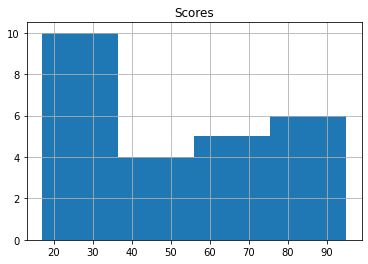

In [ ]:
df.hist(column="Scores",bins=4)

- The maximum number of students scored marks between 10-35

- The minimum number of students scored between 35-55

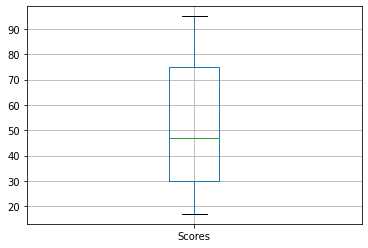

In [ ]:
df.boxplot(column="Scores")

- minimum marks : 10

- median : 45

- maximum marks : 95



To find how variables are related?

In [ ]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


- highly positively correlated (score = 0.97)

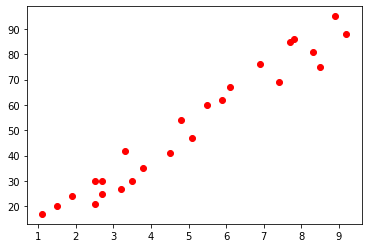

In [ ]:
plt.scatter(df['Hours'],df['Scores'],c="red")
plt.show()

# Splitting , Training and Predicting

In [ ]:
from sklearn.model_selection import train_test_split
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values   
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0)

**Linear regression**

In [ ]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(regressor.intercept_)
print(regressor.coef_)

2.018160041434662
[9.91065648]


- Regression intercept: 2.01816
- Regression coefficient: 9.9106

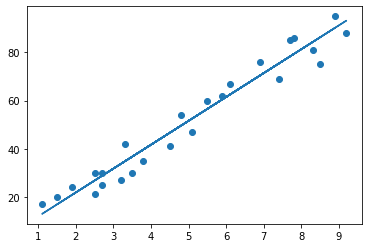

In [ ]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_
# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [ ]:
y_pred = regressor.predict(X_test)
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df1 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Predicting the score for the given hour

In [ ]:
hours=[[9.25]]
a=regressor.predict(hours)
print("for 9.25 hours the predicted score is ",a)

for 9.25 hours the predicted score is  [93.69173249]


**Accuracy of the model**


In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error
r2_score(y_test,y_pred)

0.9454906892105354

In [ ]:
mean_absolute_error(y_test, y_pred)

4.183859899002982